In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df_main = pd.read_csv('/content/drive/MyDrive/AI DL_ITV/autos.csv', encoding='latin1')
df_main.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [6]:
df_main =df_main.drop('index',axis=1) # drop the 'index' column

In [7]:
df = df_main.copy() # Create a copy of the used car DataFrame
df.head() # Display the first 5 rows of the used car DataFrame

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [8]:
# Display the data types of each column
df.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

**The 3 columns 'dateCrawled', 'dateCreated', and 'lastSeen' in the DataFrame are currently being stored as object data types, which means that they are being treated as strings. However, these columns contain date and time information, and it would be more useful to store them as datetime data types.**

In [9]:
# Converting those 3 columns to datetime data type

df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [10]:
# Again checking the datatype of all columns
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
nrOfPictures                    int64
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

In [11]:
# Calculating the percentage of missing values
missing = df.isnull().sum().sort_values(ascending=False)*100/len(df)
missing

notRepairedDamage      19.395577
vehicleType            10.192771
fuelType                8.986133
model                   5.513447
gearbox                 5.439429
kilometer               0.000000
postalCode              0.000000
nrOfPictures            0.000000
dateCreated             0.000000
brand                   0.000000
monthOfRegistration     0.000000
dateCrawled             0.000000
name                    0.000000
powerPS                 0.000000
yearOfRegistration      0.000000
abtest                  0.000000
price                   0.000000
offerType               0.000000
seller                  0.000000
lastSeen                0.000000
dtype: float64

**The notRepairedDamage column has the highest percentage of missing values (19.4%), followed by the vehicleType column (10.2%), the fuelType column (9.0%), the model column (5.5%), and the gearbox column (5.4%). These columns have a relatively large number of missing values compared to the other columns.**

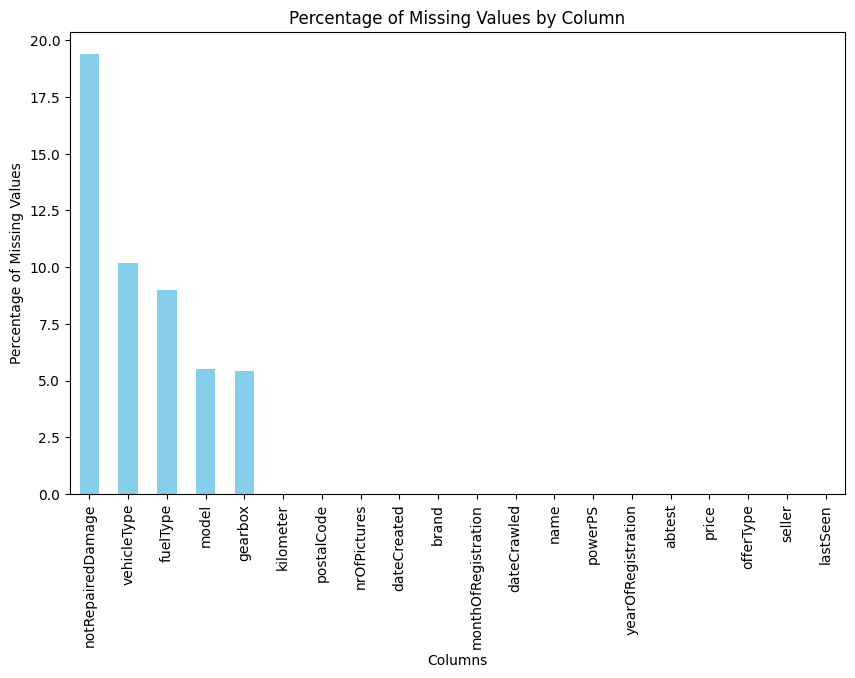

In [12]:
ax = missing.plot(kind='bar', figsize=(10, 6), color='skyblue')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage of Missing Values')
ax.set_title('Percentage of Missing Values by Column')

plt.show()

### Handling missing values

In [13]:
nRD=df['notRepairedDamage'].mode()[0]
df["notRepairedDamage"].fillna(nRD, inplace=True)

In [14]:
vt= df['vehicleType'].mode()[0]
df['vehicleType'].fillna(vt,inplace=True)

In [15]:
ft=df["fuelType"].mode()[0]
df['fuelType'].fillna(ft,inplace=True)

In [16]:
gb= df["gearbox"].mode()[0]
df['gearbox'].fillna(gb,inplace=True)

In [17]:
df["model"].fillna("unknown", inplace=True)

In [18]:
df.isnull().sum().sort_values(ascending=False)*100/len(df)

dateCrawled            0.0
name                   0.0
postalCode             0.0
nrOfPictures           0.0
dateCreated            0.0
notRepairedDamage      0.0
brand                  0.0
fuelType               0.0
monthOfRegistration    0.0
kilometer              0.0
model                  0.0
powerPS                0.0
gearbox                0.0
yearOfRegistration     0.0
vehicleType            0.0
abtest                 0.0
price                  0.0
offerType              0.0
seller                 0.0
lastSeen               0.0
dtype: float64

In [19]:
df.duplicated().sum() # there are 4 duplicated rows

4

In [20]:
df.dropna(inplace=True) # dropping any null values that might be there in the dataset
df.drop_duplicates(inplace=True) # dropping the duplicate values.

In [21]:
df.duplicated().sum() # again checking for any duplicate values, found none.

0

### Feature engineering

In [22]:
df['notRepairedDamage'].value_counts()

nein    335239
ja       36285
Name: notRepairedDamage, dtype: int64

In [23]:
# Instead of having a column which says not repaired damage and values as ja=yes and nein= no,
# we can have a column named as repaired damage values being yes or no for ease of undstanding.

In [24]:
# Create a mapping dictionary to convert values
mapping_dict = {'ja': 'No', 'nein': 'Yes'} # we reverse the meaning as out new column is Repaired damage.

# Apply the mapping to create the new column "RepairedDamage"
df['RepairedDamage'] = df['notRepairedDamage'].map(mapping_dict)

In [25]:
# Drop the original "notRepairedDamage" column
df.drop('notRepairedDamage', axis=1, inplace=True)

In [26]:
df['fuelType'].value_counts()

benzin     257240
diesel     107745
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

In [27]:
# lets translate this to english for better understanding the fuel types

In [28]:
mapping_dict = {'benzin': 'Petrol', 'diesel': 'Diesel', 'lpg': 'LPG', 'cng': 'CNG', 'hybrid': 'Hybrid', 'elektro': 'Electric', 'andere': 'Others'}
df['fuelType'] = df['fuelType'].map(mapping_dict)

In [29]:
df['gearbox'].value_counts()

manuell      294421
automatik     77103
Name: gearbox, dtype: int64

In [30]:
# lets translate this to english for better understanding the fuel types

In [31]:
mapping_dict = {'manuell': 'Manual', 'automatik': 'Automatic'}
df['gearbox'] = df['gearbox'].map(mapping_dict)

In [32]:
df['brand'] = df['brand'].replace('sonstige_autos', 'miscellaneous_brands')

In [33]:
# created a column named listinglifespan which shows the number of days a car has been listed on the website.
df['listingLifespan'] = (df['lastSeen'] - df['dateCreated']).dt.days

### Missing values

In [34]:
# Display summary statistics for numerical columns
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,listingLifespan
count,3.715240e+05,371524.000000,371524.000000,371524.000000,371524.000000,371524.0,371524.00000,371524.000000
mean,1.729530e+04,2004.578033,115.549039,125618.842928,5.734451,0.0,50820.49427,8.814900
std,3.587973e+06,92.867097,192.140488,40112.138811,3.712423,0.0,25799.08841,8.698273
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000,0.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000,2.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000,6.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000,14.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000,759.000000


###### As we can see there are outliers in multiple columns we can tackle them in multiple methods , but we'll go through them one by one.

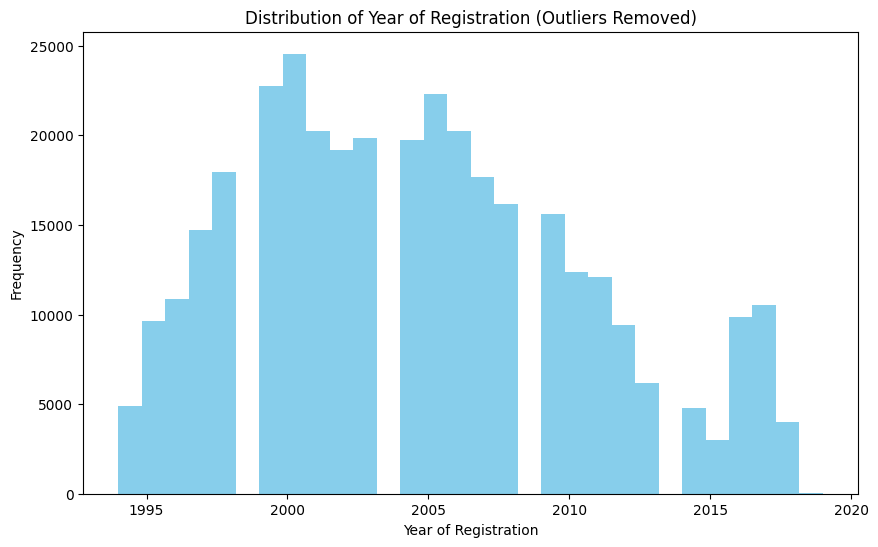

In [35]:
# for yearOfRegistration
# Define a reasonable range for valid years (e.g., 1994 to 2023)
valid_year_range = (1994, 2023)

# Filter the DataFrame to remove outliers
df = df[(df['yearOfRegistration'] >= valid_year_range[0]) & (df['yearOfRegistration'] <= valid_year_range[1])]

# Create a histogram of the filtered yearOfRegistration
plt.figure(figsize=(10, 6))
plt.hist(df['yearOfRegistration'], bins=30, color='skyblue')
plt.xlabel('Year of Registration')
plt.ylabel('Frequency')
plt.title('Distribution of Year of Registration (Outliers Removed)')
plt.show()

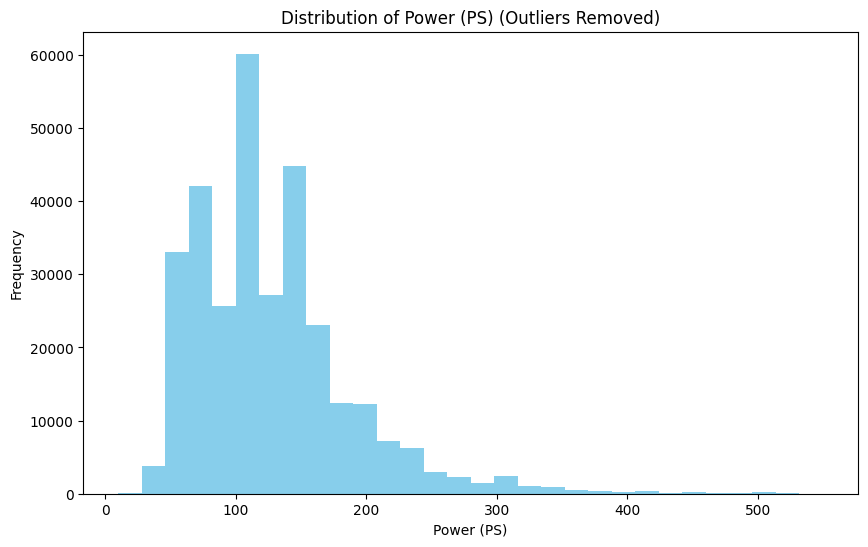

In [36]:
# for powerPS
# Define a reasonable range for valid powerPS values (e.g., 10 to 550 PS)
valid_power_range = (10, 550)

# Filter the DataFrame to remove outliers
df = df[(df['powerPS'] >= valid_power_range[0]) & (df['powerPS'] <= valid_power_range[1])]

# Create a histogram of the filtered powerPS
plt.figure(figsize=(10, 6))
plt.hist(df['powerPS'], bins=30, color='skyblue')
plt.xlabel('Power (PS)')
plt.ylabel('Frequency')
plt.title('Distribution of Power (PS) (Outliers Removed)')
plt.show()

In [37]:
df['price'].max(), df['price'].min()
# outliers found

(99999999, 0)

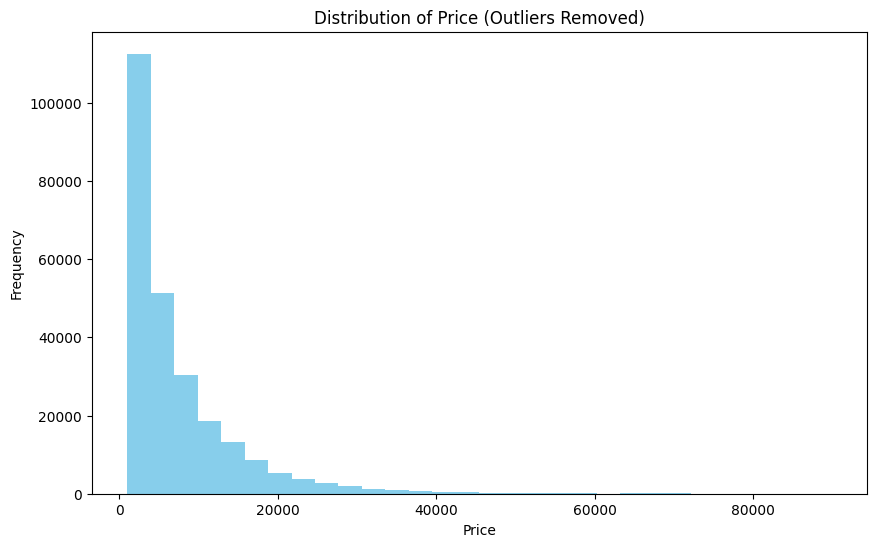

In [38]:
# For price column
# Define a reasonable range for valid price values (e.g., 1000 to 90,000)
valid_price_range = (1000, 90000)

# Filter the DataFrame to remove outliers
df = df[(df['price'] >= valid_price_range[0]) & (df['price'] <= valid_price_range[1])]

# Create a histogram of the filtered price column
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price (Outliers Removed)')
plt.show()

In [39]:
df.describe() # no outliers found now.

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,listingLifespan
count,253330.000000,253330.000000,253330.000000,253330.000000,253330.000000,253330.0,253330.000000,253330.000000
mean,7258.308483,2005.485975,134.534007,122588.422216,6.152303,0.0,51995.657320,9.325437
std,7709.386371,5.300896,61.140813,40418.715266,3.525488,0.0,25673.524626,8.693396
min,1000.000000,1994.000000,10.000000,5000.000000,0.000000,0.0,1067.000000,0.000000
25%,2300.000000,2002.000000,90.000000,100000.000000,3.000000,0.0,31655.000000,2.000000
50%,4600.000000,2005.000000,122.000000,150000.000000,6.000000,0.0,51107.000000,7.000000
75%,9300.000000,2009.000000,163.000000,150000.000000,9.000000,0.0,72762.000000,14.000000
max,89900.000000,2019.000000,550.000000,150000.000000,12.000000,0.0,99998.000000,384.000000


##  EDA

### **What is relation between Car price and the year of registration?**

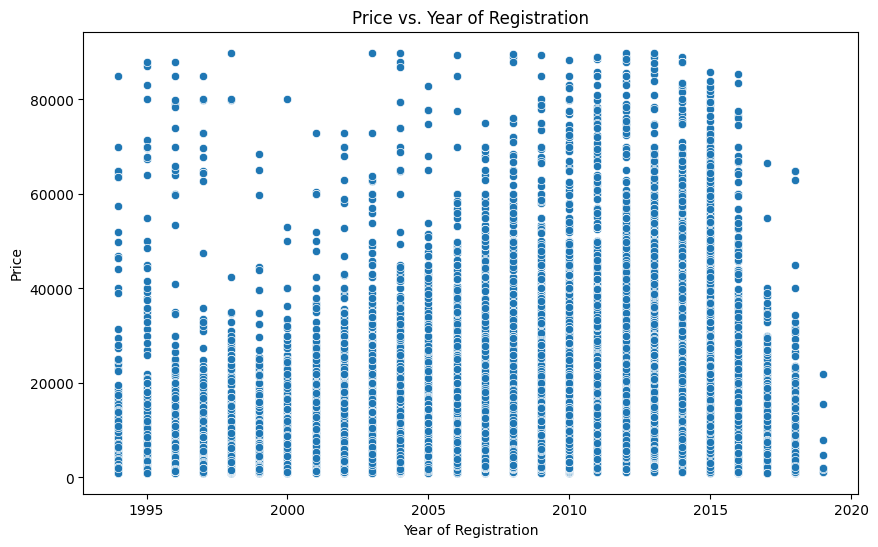

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='yearOfRegistration', y='price')
plt.xlabel('Year of Registration')
plt.ylabel('Price')
plt.title('Price vs. Year of Registration')
plt.show()


**According to the plot, we can understand that the cars that have a newer registration tend to be at the higher price range, this could also be due the demand of a newer car which will longer using lifespan.**

### **What is the relationship between the price of a car and whether or not it has damage that has been repaired?**

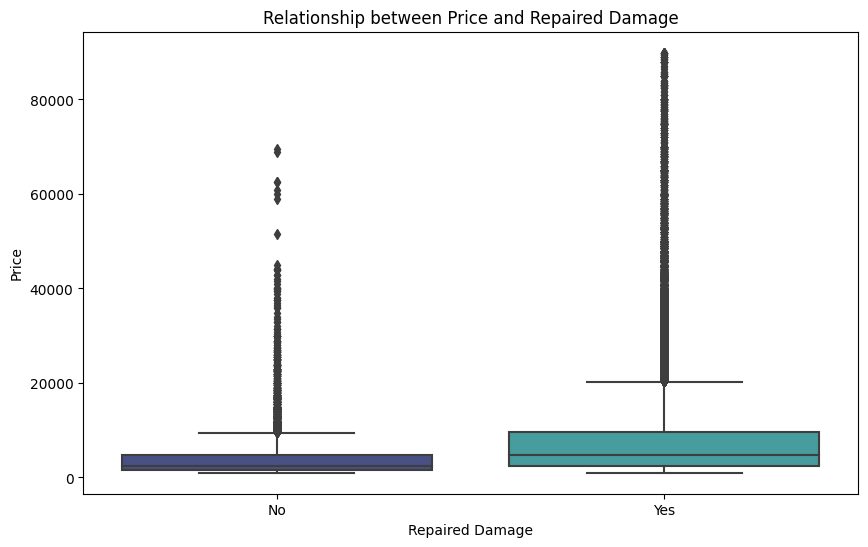

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RepairedDamage', y='price', data=df, palette='mako')
plt.xlabel('Repaired Damage')
plt.ylabel('Price')
plt.title('Relationship between Price and Repaired Damage')
plt.show()

**According to the plot, cars that have already been repaired or have not been damaged tend to have higher price compared to cars that have not yet been repaired or have been damaged. This could potentially be because cars that are in better condition tend to be more desirable and therefore command higher prices. Additionally, it could also be because the cost of repairing damage to a car can be significant, so buyers may be willing to pay more for a car that is already in good condition to avoid having to make those repairs themselves.**

### **What is the relationship between powerPS and price of a used car ?**

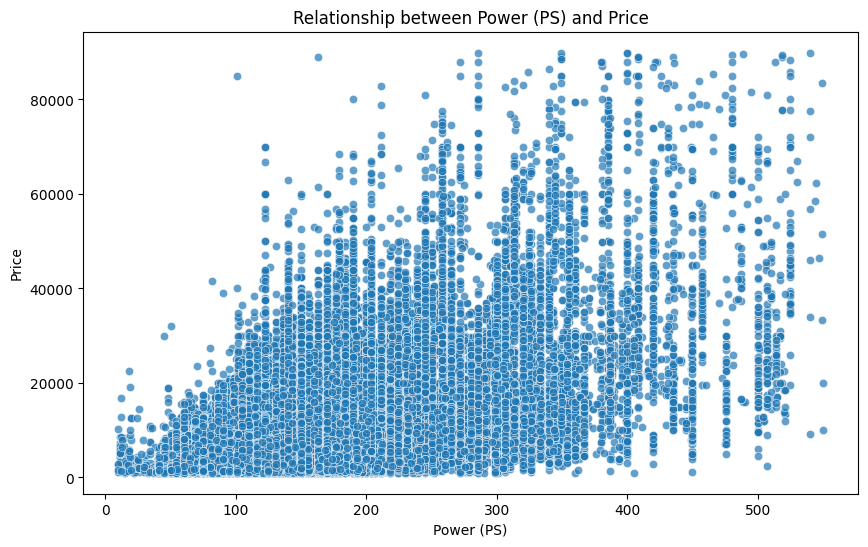

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='powerPS', y='price', alpha=0.7)
plt.xlabel('Power (PS)')
plt.ylabel('Price')
plt.title('Relationship between Power (PS) and Price')
plt.show()

**Based on the plot, it appears that there is a slight positive relationship between the power of the car in PS and the price of the car. This means that, as the power of the car increases, the price of the car tends to increase as well. However, it is important to note that other factors may also be influencing the price.**

### **What is the relationship between Fuel Type and average price of a used car?**

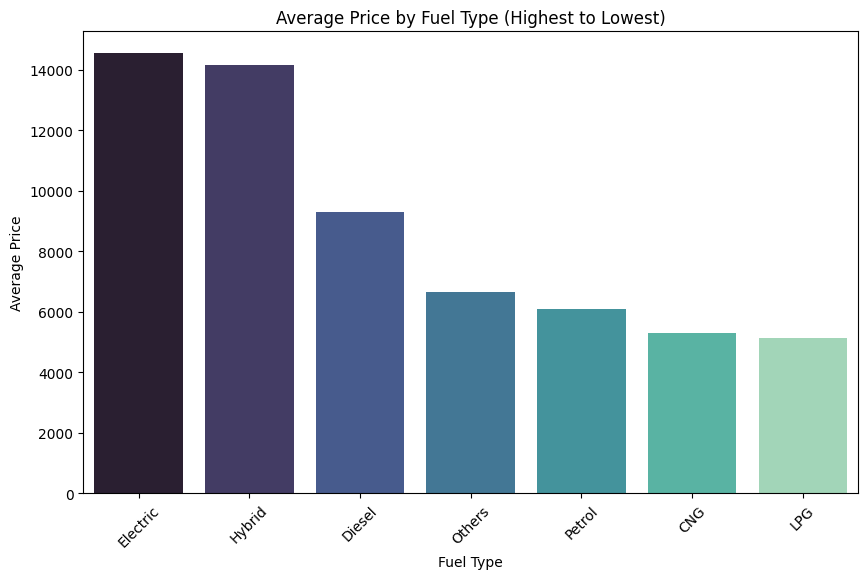

In [43]:
avg_price_by_fuel = df.groupby('fuelType')['price'].mean().reset_index()
avg_price_by_fuel = avg_price_by_fuel.sort_values(by='price', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='fuelType', y='price', data=avg_price_by_fuel, palette='mako')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Average Price by Fuel Type (Highest to Lowest)')
plt.xticks(rotation=45)
plt.show()

**Based on this plot, it appears that Electric cars tend to be slightly more expensive than the Hybrid Cars. We can also see that even in the used car segment Diesel Cars are still significant priced higher in comparison to Petrol cars. The cheapest Fuel type observed by us is LPG.**

### What is the relationship between price and gearbox type in used cars?

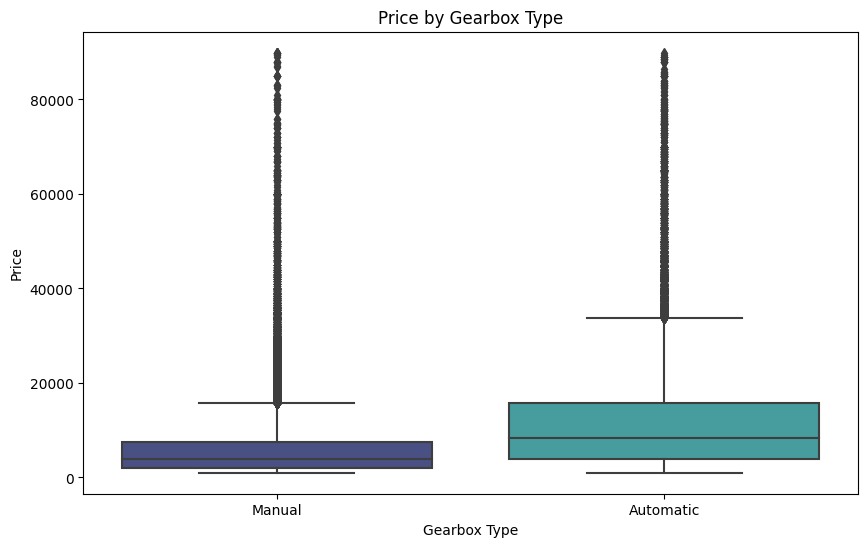

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gearbox', y='price', data=df, palette = 'mako')
plt.xlabel('Gearbox Type')
plt.ylabel('Price')
plt.title('Price by Gearbox Type')
plt.show()

**Based on this plot, it appears that cars with automatic gearboxes tend to be slightly more expensive than cars with manual gearboxes. This can potentially be due to various factors such as the popularity and demand for automatic gearboxes, or perhaps the additional features and technology that may come with cars equipped with automatic gearboxes.**

### What are the five most expensive car brands based on their mean price?

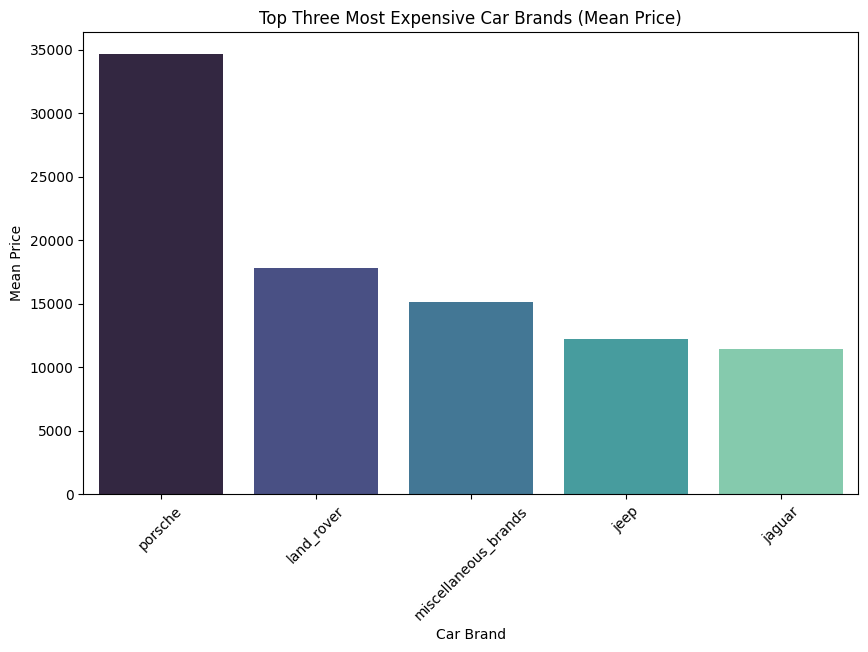

In [45]:
mean_price_by_brand = df.groupby('brand')['price'].mean().reset_index()  #the mean price for each car brand
mean_price_by_brand_sorted = mean_price_by_brand.sort_values('price', ascending=False) # the brands by mean price in descending order

top_three_brand = mean_price_by_brand_sorted.head()

plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='price', data=top_three_brand, palette='mako')
plt.xlabel('Car Brand')
plt.ylabel('Mean Price')
plt.title('Top Three Most Expensive Car Brands (Mean Price)')
plt.xticks(rotation=45)
plt.show()

**According to this plot, the top five most expensive car brands are Porsche, Land Rover, miscellaneous brands combined, Jeep and Jaguar in that order. This means that, on average, Porsche cars are the most expensive, followed by Land Rover, then a combined total of all the small miscellaneous brands, which is followed by Jeep and then Jaguar.**

###  Analyzing whether higher-priced cars remain listed longer compared to cheaper-priced cars ?

In [46]:

# Defining a price threshold to differentiate between higher-priced and cheaper listings
price_threshold = 9000

# Creating two subsets: one for higher-priced cars and one for cheaper cars
higher_priced_cars = df[df['price'] > price_threshold]
cheaper_cars = df[df['price'] <= price_threshold]

# Calculating the average listing lifespan for both subsets
avg_lifespan_higher_priced = higher_priced_cars['listingLifespan'].mean()
avg_lifespan_cheaper = cheaper_cars['listingLifespan'].mean()

print("Average Listing Lifespan for Higher-Priced Cars:", avg_lifespan_higher_priced)
print("Average Listing Lifespan for Cheaper Cars:", avg_lifespan_cheaper)

Average Listing Lifespan for Higher-Priced Cars: 11.209286069342612
Average Listing Lifespan for Cheaper Cars: 8.683616118208665


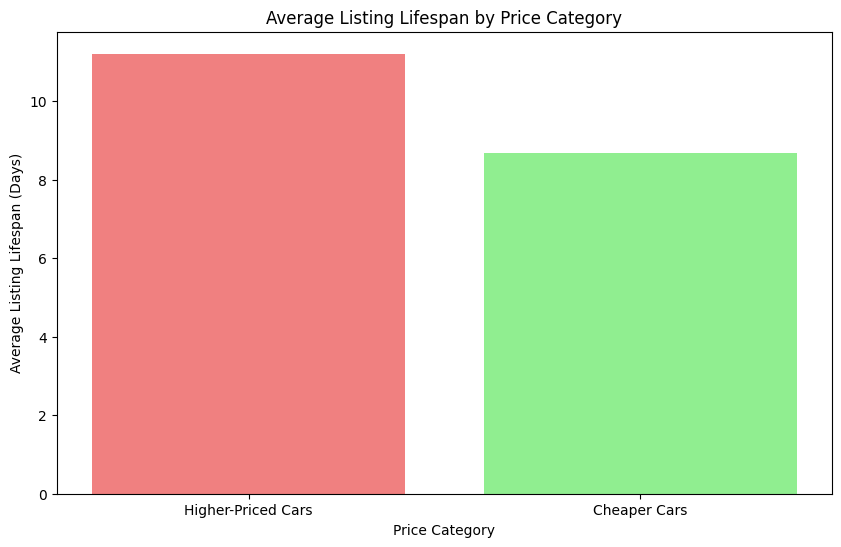

In [47]:
categories = ['Higher-Priced Cars', 'Cheaper Cars']
avg_lifespans = [avg_lifespan_higher_priced, avg_lifespan_cheaper]


plt.figure(figsize=(10, 6))
plt.bar(categories, avg_lifespans, color=['lightcoral', 'lightgreen'])
plt.xlabel('Price Category')
plt.ylabel('Average Listing Lifespan (Days)')
plt.title('Average Listing Lifespan by Price Category')
plt.show()

**We can clearly see that cars priced higher tend to stick along for a couple of days longer on the website as compared to the lower priced cars.**

# Modeling  

In [48]:
# dropping unnecessary columns ,which are not useful in making a model.
unwanted_col = ["nrOfPictures", "lastSeen", "dateCrawled", "name", "monthOfRegistration", "dateCreated", "postalCode", "seller", "offerType","listingLifespan","brand","model"]
df= df.drop(unwanted_col, axis=1)

In [49]:
df.dtypes

price                  int64
abtest                object
vehicleType           object
yearOfRegistration     int64
gearbox               object
powerPS                int64
kilometer              int64
fuelType              object
RepairedDamage        object
dtype: object

## Converting Catergories to Numbers

In [50]:
df['abtest'].value_counts()

test       131167
control    122163
Name: abtest, dtype: int64

In [51]:
df['vehicleType'].value_counts()

limousine     83620
kombi         51909
kleinwagen    47128
bus           24877
cabrio        18317
coupe         13094
suv           12707
andere         1678
Name: vehicleType, dtype: int64

In [52]:
df['gearbox'].value_counts()

Manual       190293
Automatic     63037
Name: gearbox, dtype: int64

In [53]:
df['fuelType'].value_counts()

Petrol      155457
Diesel       92951
LPG           4117
CNG            463
Hybrid         235
Electric        66
Others          41
Name: fuelType, dtype: int64

In [54]:
df['RepairedDamage'].value_counts()

Yes    238420
No      14910
Name: RepairedDamage, dtype: int64

In [55]:
df['abtest'] = df['abtest'].map({'test' : 0,'control' : 1})
df['vehicleType'] = df['vehicleType'].map({'limousine' : 0,'kombi' : 1,'kleinwagen' : 2,'bus' : 3,'cabrio' : 4,'coupe' : 5,'suv' : 6,'andere' : 7})
df['gearbox'] = df['gearbox'].map({'Manual' : 0,'Automatic' : 1})
df['fuelType'] = df['fuelType'].map({'Petrol' : 0,'Diesel' : 1,'LPG' : 2,'CNG' : 3,'Hybrid' : 4,'Electric' : 5,'Others' : 6})
df['RepairedDamage'] = df['RepairedDamage'].map({'Yes' : 0,'No' : 1})

In [56]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,RepairedDamage
1,18300,0,5,2011,0,190,125000,1,1
2,9800,0,6,2004,1,163,125000,1,0
3,1500,0,2,2001,0,75,150000,0,0
4,3600,0,2,2008,0,69,90000,1,0
6,2200,0,4,2004,0,109,150000,0,0


In [57]:
df.info() # All converted to integer data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253330 entries, 1 to 371527
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   price               253330 non-null  int64
 1   abtest              253330 non-null  int64
 2   vehicleType         253330 non-null  int64
 3   yearOfRegistration  253330 non-null  int64
 4   gearbox             253330 non-null  int64
 5   powerPS             253330 non-null  int64
 6   kilometer           253330 non-null  int64
 7   fuelType            253330 non-null  int64
 8   RepairedDamage      253330 non-null  int64
dtypes: int64(9)
memory usage: 19.3 MB


## splitting the data into X and y

In [58]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [59]:
y

1         18300
2          9800
3          1500
4          3600
6          2200
          ...  
371520     3200
371524     1199
371525     9200
371526     3400
371527    28990
Name: price, Length: 253330, dtype: int64

In [60]:
X.shape , y.shape

((253330, 8), (253330,))

## Scaling

In [61]:
# applying 'for loop' to bring all the variables in rabge 0 to 1
for i in X.columns[:]:
    X[i]  = (X[i] - X[i].min()) / (X[i].max() - X[i].min())

In [62]:
X.head()

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,RepairedDamage
1,0.0,0.714286,0.68,0.0,0.333333,0.827586,0.166667,1.0
2,0.0,0.857143,0.40,1.0,0.283333,0.827586,0.166667,0.0
3,0.0,0.285714,0.28,0.0,0.120370,1.000000,0.000000,0.0
4,0.0,0.285714,0.56,0.0,0.109259,0.586207,0.166667,0.0
6,0.0,0.571429,0.40,0.0,0.183333,1.000000,0.000000,0.0


## Split Training and Testing data.

In [63]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.30, random_state=123)

In [64]:
Xtrain.shape , Xtest.shape, ytrain.shape,ytest.shape

((177331, 8), (75999, 8), (177331,), (75999,))

## Defining Architecture of the Neural Network

In [65]:
# important libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense
from sklearn.metrics import mean_absolute_error, r2_score

###  Defining different layers in out model

In [66]:
# defining input neurons
input_neurons = Xtrain.shape[1]
print(f'Number of input Neurons : {input_neurons}')

Number of input Neurons : 8


## Model Architecture

In [109]:
# Model 1
model1 = Sequential()
model1.add(InputLayer(input_shape= (input_neurons,))) #adding Layers
model1.add(Dense(20 ,activation='relu')) # set number of neurons using units
model1.add(Dense(1 ,activation='linear'))

In [133]:
# model 2
model2 = Sequential()
model2.add(InputLayer(input_shape= (input_neurons,)))
model2.add(Dense(15 ,activation='relu'))
model2.add(Dense(10 ,activation='relu'))
model2.add(Dense(1 ,activation='linear'))


In [134]:

# model 3
model3 = Sequential()
model3.add(InputLayer(input_shape= (input_neurons,)))
model3.add(Dense(20 ,activation='relu'))
model3.add(Dense(10 ,activation='relu'))
model3.add(Dense(1 ,activation='linear'))


In [137]:

# model 4
model4 = Sequential()
model4.add(InputLayer(input_shape= (input_neurons,)))
model4.add(Dense(20 ,activation='relu'))
model4.add(Dense(15 ,activation='relu'))
model4.add(Dense(1 ,activation='linear'))

In [138]:
# model 1 summary
model1.summary()

print("#"*150)
print("#"*150)

# model 2 summary
model2.summary()

print("#"*150)
print("#"*150)

# model 3 summary
model3.summary()

print("#"*150)
print("#"*150)

# model 4 summary
model4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 20)                180       
                                                                 
 dense_71 (Dense)            (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
######################################################################################################################################################
######################################################################################################################################################
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param

### Compiling all Models (defining loss function, optimizer)

In [114]:
model1.compile(loss='mean_absolute_error',optimizer='Adam')

In [139]:
model2.compile(loss='mean_absolute_error',optimizer='Adam')

In [140]:
model3.compile(loss='mean_absolute_error',optimizer='Adam')

In [141]:
model4.compile(loss='mean_absolute_error',optimizer='Adam')

## Training Models

In [128]:
model1_history = model1.fit(Xtrain, ytrain, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
4434/4434 [==============================] - 11s 2ms/step - loss: 6707.0239 - val_loss: 5738.3438
Epoch 2/50
4434/4434 [==============================] - 11s 3ms/step - loss: 5096.7485 - val_loss: 4623.3330
Epoch 3/50
4434/4434 [==============================] - 11s 2ms/step - loss: 4537.0171 - val_loss: 4369.4019
Epoch 4/50
4434/4434 [==============================] - 10s 2ms/step - loss: 4321.3462 - val_loss: 4156.2944
Epoch 5/50
4434/4434 [==============================] - 12s 3ms/step - loss: 4099.3037 - val_loss: 3926.7185
Epoch 6/50
4434/4434 [==============================] - 10s 2ms/step - loss: 3871.1716 - val_loss: 3703.7051
Epoch 7/50
4434/4434 [==============================] - 20s 5ms/step - loss: 3662.2227 - val_loss: 3510.2170
Epoch 8/50
4434/4434 [==============================] - 13s 3ms/step - loss: 3491.9155 - val_loss: 3358.5505
Epoch 9/50
4434/4434 [==============================] - 12s 3ms/step - loss: 3360.4617 - val_loss: 3244.8850
Epoch 10/50
4434/44

In [142]:
ypred1 = model1.predict(Xtest)

2375/2375 [==============================] - 3s 1ms/step


In [143]:
pred1= r2_score(ytest,ypred1)
print(pred1)

0.6314731218429543


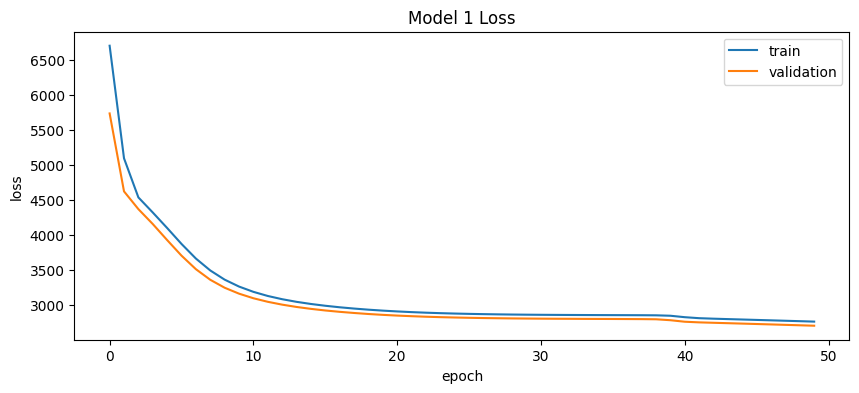

In [146]:
plt.figure(figsize=(10,4))
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])   # validation loss values

plt.title('Model 1 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

In [147]:
model2_history = model2.fit(Xtrain, ytrain, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
2217/2217 [==============================] - 7s 3ms/step - loss: 5729.1782 - val_loss: 4469.8481
Epoch 2/100
2217/2217 [==============================] - 6s 2ms/step - loss: 4312.6138 - val_loss: 4005.3455
Epoch 3/100
2217/2217 [==============================] - 9s 4ms/step - loss: 3754.3872 - val_loss: 3395.0935
Epoch 4/100
2217/2217 [==============================] - 6s 3ms/step - loss: 3235.5361 - val_loss: 2980.7388
Epoch 5/100
2217/2217 [==============================] - 6s 3ms/step - loss: 2879.6992 - val_loss: 2688.8513
Epoch 6/100
2217/2217 [==============================] - 7s 3ms/step - loss: 2652.7012 - val_loss: 2533.1870
Epoch 7/100
2217/2217 [==============================] - 6s 2ms/step - loss: 2525.0325 - val_loss: 2437.8362
Epoch 8/100
2217/2217 [==============================] - 6s 3ms/step - loss: 2444.7412 - val_loss: 2376.1089
Epoch 9/100
2217/2217 [==============================] - 8s 3ms/step - loss: 2394.4133 - val_loss: 2340.5544
Epoch 10/100
2217/2

In [148]:
ypred2 = model2.predict(Xtest)

2375/2375 [==============================] - 5s 2ms/step


In [149]:
pred2= r2_score(ytest,ypred2)
print(pred2)

0.7806454014835348


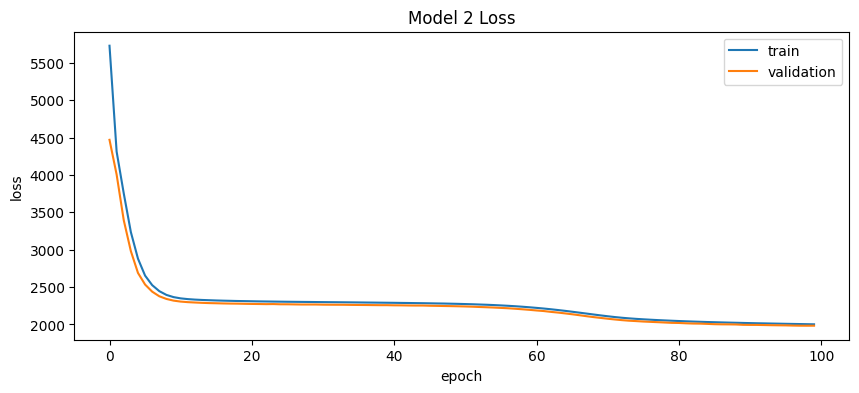

In [150]:
# model 2
plt.figure(figsize=(10,4))
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])   # validation loss values

plt.title('Model 2 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

In [151]:
model3_history = model3.fit(Xtrain, ytrain, epochs=80, batch_size=64, validation_split=0.2)

Epoch 1/80
2217/2217 [==============================] - 7s 3ms/step - loss: 5649.7217 - val_loss: 4443.7368
Epoch 2/80
2217/2217 [==============================] - 19s 9ms/step - loss: 4246.1299 - val_loss: 3876.2388
Epoch 3/80
2217/2217 [==============================] - 8s 3ms/step - loss: 3593.5759 - val_loss: 3242.9917
Epoch 4/80
2217/2217 [==============================] - 11s 5ms/step - loss: 3127.0232 - val_loss: 2929.0093
Epoch 5/80
2217/2217 [==============================] - 6s 2ms/step - loss: 2886.5613 - val_loss: 2745.6077
Epoch 6/80
2217/2217 [==============================] - 7s 3ms/step - loss: 2706.7131 - val_loss: 2568.7395
Epoch 7/80
2217/2217 [==============================] - 6s 3ms/step - loss: 2562.1084 - val_loss: 2471.1741
Epoch 8/80
2217/2217 [==============================] - 5s 2ms/step - loss: 2485.8943 - val_loss: 2414.1667
Epoch 9/80
2217/2217 [==============================] - 7s 3ms/step - loss: 2432.3962 - val_loss: 2368.3423
Epoch 10/80
2217/2217 [===

In [152]:
ypred3 = model3.predict(Xtest)

2375/2375 [==============================] - 4s 1ms/step


In [153]:
pred3= r2_score(ytest,ypred3)
print(pred3)

0.7399177389352327


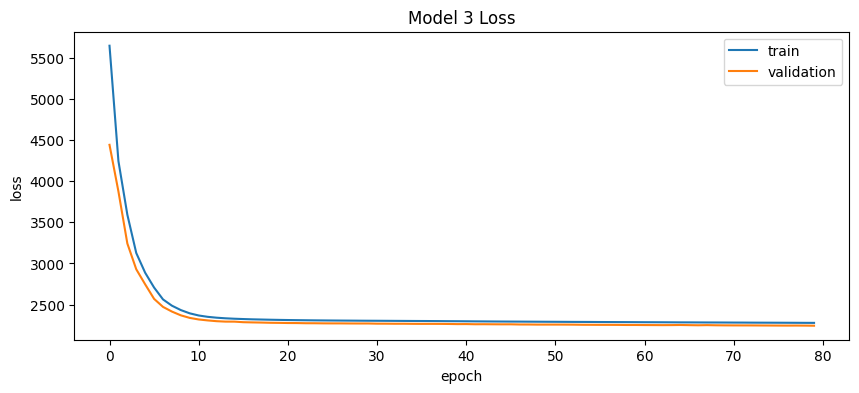

In [154]:
plt.figure(figsize=(10,4))
plt.plot(model3_history.history['loss'])
plt.plot(model3_history.history['val_loss'])   # validation loss values

plt.title('Model 3 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

In [155]:
model4_history = model4.fit(Xtrain, ytrain, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
4434/4434 [==============================] - 14s 3ms/step - loss: 4826.1099 - val_loss: 3782.0071
Epoch 2/50
4434/4434 [==============================] - 16s 4ms/step - loss: 3296.5596 - val_loss: 2893.6304
Epoch 3/50
4434/4434 [==============================] - 17s 4ms/step - loss: 2751.8545 - val_loss: 2553.0986
Epoch 4/50
4434/4434 [==============================] - 17s 4ms/step - loss: 2526.8613 - val_loss: 2428.6382
Epoch 5/50
4434/4434 [==============================] - 13s 3ms/step - loss: 2439.3416 - val_loss: 2373.3147
Epoch 6/50
4434/4434 [==============================] - 11s 2ms/step - loss: 2398.1809 - val_loss: 2344.7439
Epoch 7/50
4434/4434 [==============================] - 12s 3ms/step - loss: 2373.8386 - val_loss: 2325.0496
Epoch 8/50
4434/4434 [==============================] - 12s 3ms/step - loss: 2357.7588 - val_loss: 2312.4207
Epoch 9/50
4434/4434 [==============================] - 11s 3ms/step - loss: 2346.7686 - val_loss: 2303.9409
Epoch 10/50
4434/44

In [156]:
ypred4 = model4.predict(Xtest)

2375/2375 [==============================] - 4s 2ms/step


In [157]:
pred4= r2_score(ytest,ypred4)
print(pred4)

0.7417697073354237


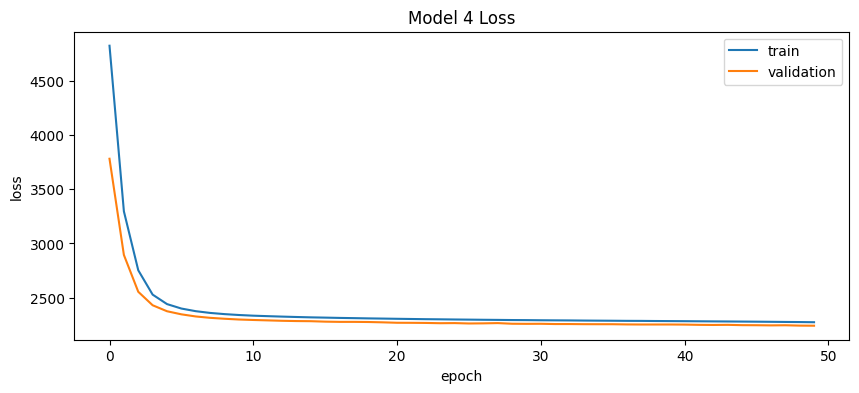

In [158]:
plt.figure(figsize=(10,4))
plt.plot(model4_history.history['loss'])
plt.plot(model4_history.history['val_loss'])   # validation loss values

plt.title('Model 4 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

### Predictions in one place

In [159]:
ypred1 = model1.predict(Xtest)
ypred2 = model2.predict(Xtest)
ypred3 = model3.predict(Xtest)
ypred4 = model4.predict(Xtest)

2375/2375 [==============================] - 3s 1ms/step


In [160]:
pred1= r2_score(ytest,ypred1)
print(pred1)

0.6314731218429543


In [161]:
pred2= r2_score(ytest,ypred2)
print(pred2)

0.7806454014835348


In [162]:
pred3= r2_score(ytest,ypred3)
print(pred3)

0.7399177389352327


In [163]:
pred4= r2_score(ytest,ypred4)
print(pred4)

0.7417697073354237


### **Observation** : The above model predictions show us that ypred2 that is the model 2 is the best out all the 4 models, it has given us the least loss and also has the highest r2 score of 0.78.

### Visualizing Model Performances in one place

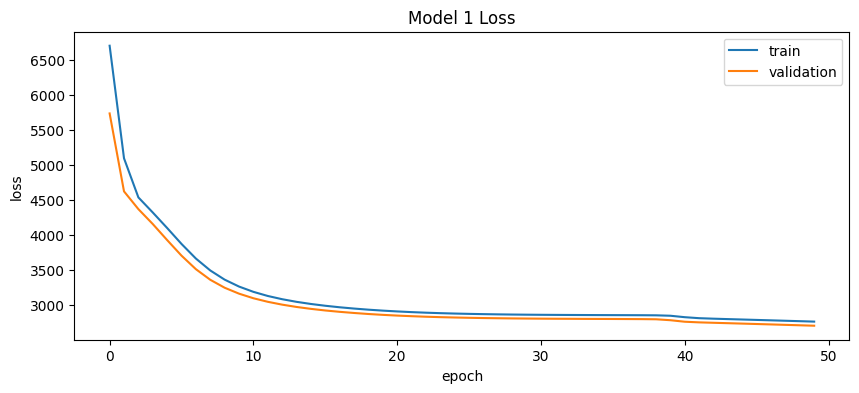

In [164]:
# model 1
plt.figure(figsize=(10,4))
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])   # validation loss values

plt.title('Model 1 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

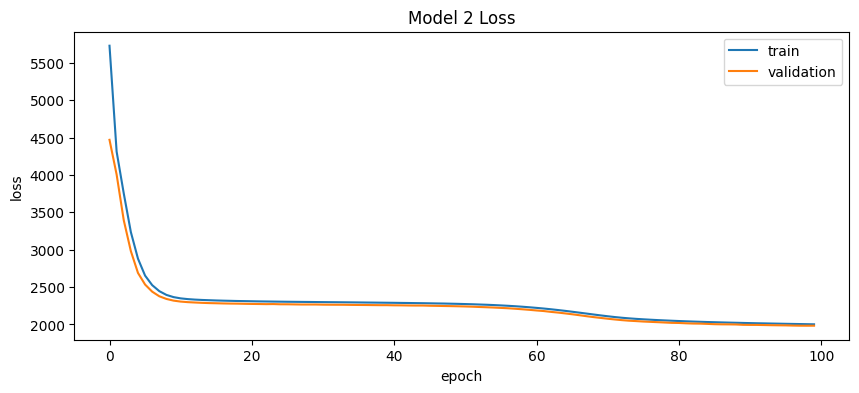

In [165]:
# model 2
plt.figure(figsize=(10,4))
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])   # validation loss values

plt.title('Model 2 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

## **Observation** : Here in model 2 chart we can see the training and validation loss almost going flat in the 60 epoch range but then again the loss going down after the 70 epochs range, this shows that the model was capable enough to navigate and cross a local minima and go towards the global minima.

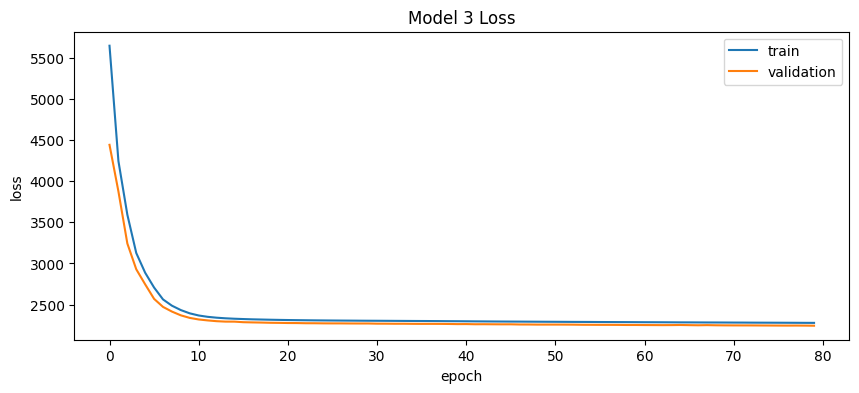

In [166]:
# model 3
plt.figure(figsize=(10,4))
plt.plot(model3_history.history['loss'])
plt.plot(model3_history.history['val_loss'])   # validation loss values

plt.title('Model 3 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

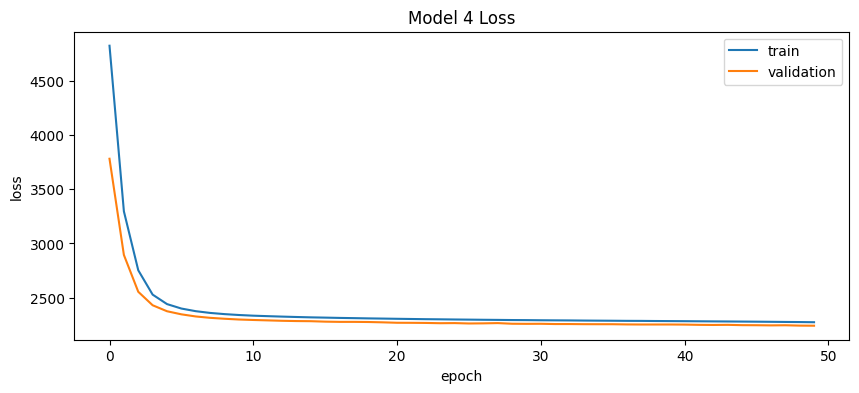

In [167]:
# model 4
plt.figure(figsize=(10,4))
plt.plot(model4_history.history['loss'])
plt.plot(model4_history.history['val_loss'])   # validation loss values

plt.title('Model 4 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

## **Observation** : From all the plots of model losses we can understand a fact very clearly that training and validation loss is decreasing as the epoch are increasing, but this not the case of all the model, in model 3 and 4, we can see that after a certain period of time the number epochs increasing does not decrease the traing or validation loss, rather the line just goes flat.